# House prices prediction 

In [4]:
%%html
<img src="house_prices_dataset.jpg" width="700"/>

In [5]:
# We have a bunch of features, like cordinates, median age, total rooms, total bedrooms, population, areas
# We have also the target value : the median house value to determine ==> a regression task, we gonna try to predict the house value based on all the other features


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. longitude: A measure of how far west a house is; a higher value is farther west
#### 2. latitude: A measure of how far north a house is; a higher value is farther north
#### 3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
#### 4. totalRooms: Total number of rooms within a block
#### 5. totalBedrooms: Total number of bedrooms within a block
#### 6. population: Total number of people residing within a block
#### 7. households: Total number of households, a group of people residing within a home unit, for a block
#### 8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
#### 9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
#### 10. oceanProximity: Location of the house w.r.t ocean/sea

## 1/DATA_Exploration

In [137]:
data = pd.read_csv("housing.csv")

In [138]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [140]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [141]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [142]:
data.dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [143]:
data.dropna(inplace=True)
#SAVE THE RESULT

In [144]:
data.info()
data


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [145]:
from sklearn.model_selection import train_test_split

#We define X and y
X=data.drop(['median_house_value'], axis=1)
y=data['median_house_value']



In [146]:
X


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [147]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# We dont touch the X_test until we are done with the training and we have our model


In [149]:
train_data = X_train.join(y_train)


In [150]:
train_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
2814,-119.05,35.42,41.0,1992.0,421.0,1006.0,419.0,2.8393,INLAND,57000.0
9211,-120.31,37.11,38.0,1696.0,301.0,985.0,278.0,2.4054,INLAND,112500.0
5938,-117.90,34.14,29.0,2240.0,457.0,1187.0,407.0,3.8365,<1H OCEAN,184200.0
20163,-119.31,34.44,5.0,403.0,48.0,208.0,54.0,12.6320,NEAR OCEAN,500001.0
9063,-118.16,34.68,9.0,4303.0,900.0,2240.0,861.0,3.7807,INLAND,110900.0
...,...,...,...,...,...,...,...,...,...,...
15776,-122.45,37.77,52.0,3939.0,852.0,1737.0,797.0,4.5052,NEAR BAY,500001.0
12989,-121.26,38.68,4.0,3080.0,827.0,1195.0,683.0,2.7477,INLAND,133000.0
14688,-117.08,32.80,25.0,2963.0,552.0,1162.0,556.0,3.6250,NEAR OCEAN,184500.0
6072,-117.85,34.08,23.0,1160.0,166.0,467.0,178.0,8.1050,<1H OCEAN,386200.0


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

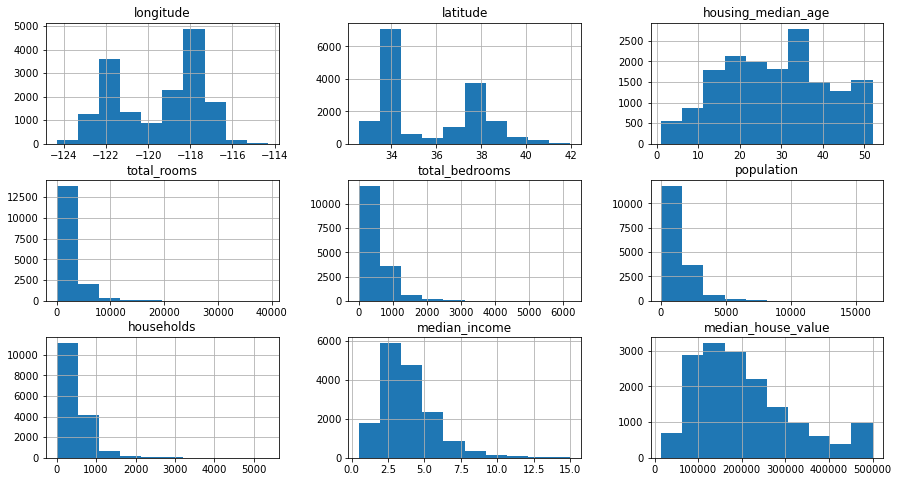

In [151]:
train_data.hist(figsize = (15, 8))

In [152]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924272,-0.103278,0.047437,0.072442,0.103011,0.059261,-0.012080,-0.039579
latitude,-0.924272,1.000000,0.007188,-0.040541,-0.071053,-0.112899,-0.075858,-0.083908,-0.151235
housing_median_age,-0.103278,0.007188,1.000000,-0.362521,-0.322604,-0.304703,-0.305124,-0.118767,0.106859
total_rooms,0.047437,-0.040541,-0.362521,1.000000,0.929721,0.865316,0.918401,0.199504,0.136772
total_bedrooms,0.072442,-0.071053,-0.322604,0.929721,1.000000,0.885481,0.979519,-0.005743,0.053689
population,0.103011,-0.112899,-0.304703,0.865316,0.885481,1.000000,0.915126,0.010067,-0.020074
households,0.059261,-0.075858,-0.305124,0.918401,0.979519,0.915126,1.000000,0.015934,0.069266
median_income,-0.012080,-0.083908,-0.118767,0.199504,-0.005743,0.010067,0.015934,1.000000,0.688324
median_house_value,-0.039579,-0.151235,0.106859,0.136772,0.053689,-0.020074,0.069266,0.688324,1.000000


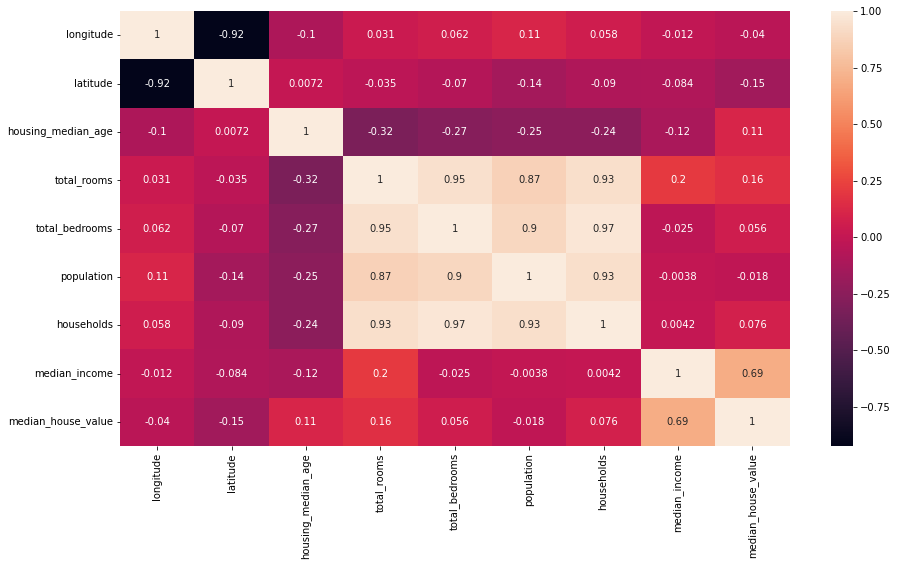

In [178]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True)
plt.savefig('Heatmap_Correlation_1.png')

In [154]:
# as we can see the the median income correlates with the median house value


## 2/Data Preprocessing

In [155]:
# We gonna calculate and represent the log of the different features and see what the distribution looks like

train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)


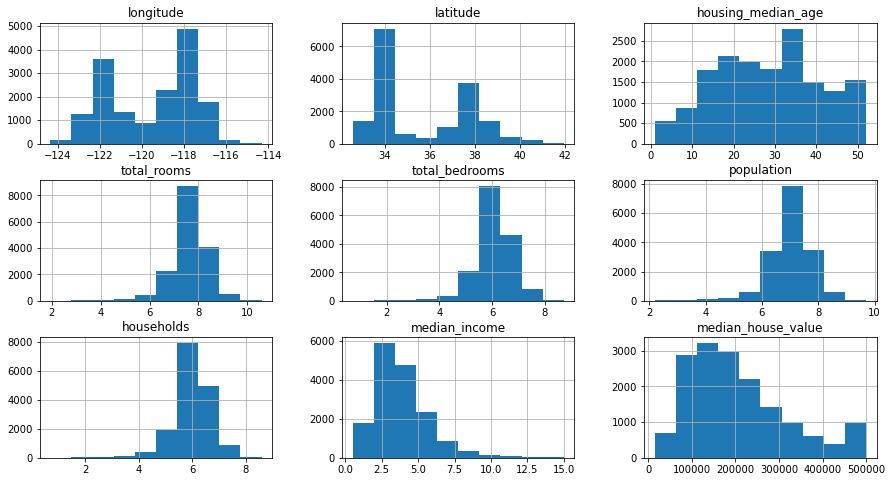

In [179]:
train_data.hist(figsize=(15,8))
plt.savefig('Histogram_plotting_features_1.png')

In [158]:
# We gonna use the feature ocean_proximity for our analysis
train_data.ocean_proximity.value_counts()

<1H OCEAN     7219
INLAND        5189
NEAR OCEAN    2111
NEAR BAY      1823
ISLAND           4
Name: ocean_proximity, dtype: int64

In [159]:
train_d = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [160]:
train_d

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2814,-119.05,35.42,41.0,7.597396,6.045005,6.914731,6.040255,2.8393,57000.0,0,1,0,0,0
9211,-120.31,37.11,38.0,7.436617,5.710427,6.893656,5.631212,2.4054,112500.0,0,1,0,0,0
5938,-117.90,34.14,29.0,7.714677,6.126869,7.080026,6.011267,3.8365,184200.0,1,0,0,0,0
20163,-119.31,34.44,5.0,6.001415,3.891820,5.342334,4.007333,12.6320,500001.0,0,0,0,0,1
9063,-118.16,34.68,9.0,8.367300,6.803505,7.714677,6.759255,3.7807,110900.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15776,-122.45,37.77,52.0,8.278936,6.748760,7.460490,6.682109,4.5052,500001.0,0,0,0,1,0
12989,-121.26,38.68,4.0,8.033009,6.719013,7.086738,6.527958,2.7477,133000.0,0,1,0,0,0
14688,-117.08,32.80,25.0,7.994295,6.315358,7.058758,6.322565,3.6250,184500.0,0,0,0,0,1
6072,-117.85,34.08,23.0,7.057037,5.117994,6.148468,5.187386,8.1050,386200.0,1,0,0,0,0


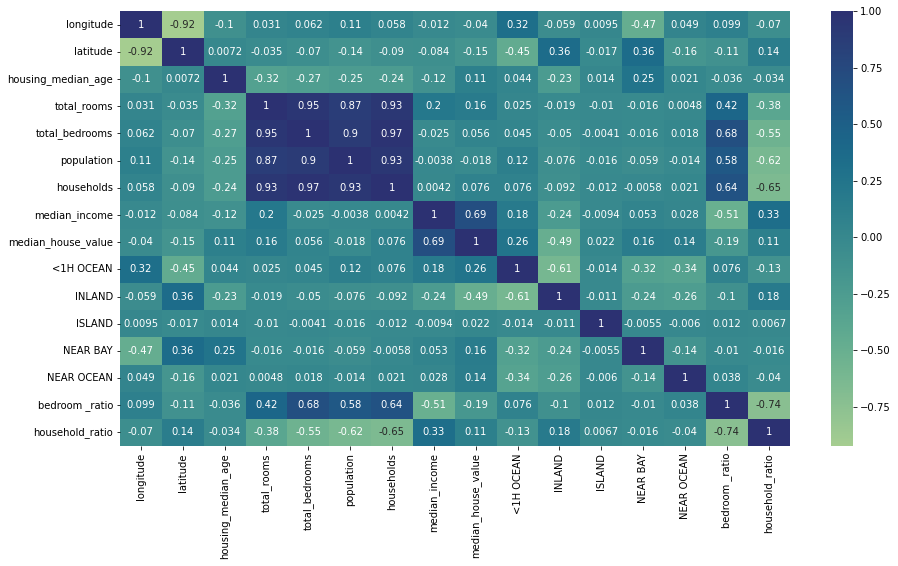

In [187]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_d.corr(), cmap="crest", annot=True)
plt.savefig('Heatmap_Correlation_2.png')

In [ ]:
# Now we can see that with <1h OCEAN and the median house correlate, on the contrary it's not the case for the feature INLAND

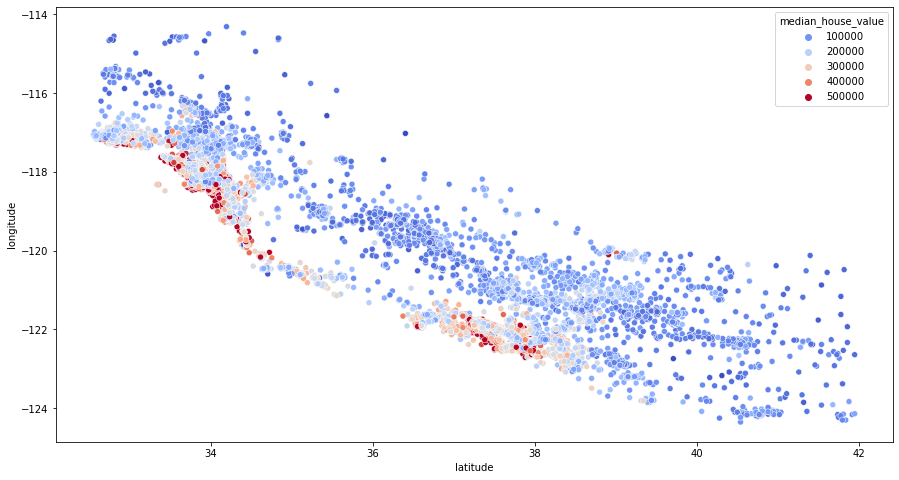

In [181]:
# let's see now how the location influences the prices
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y='longitude', data=train_d, hue="median_house_value", palette="coolwarm")
plt.savefig('scatter_plot_Location.png')

## 3/Feature engineering 

In [165]:
train_d["bedroom _ratio"] = train_d['total_bedrooms']/train_d['total_rooms']
train_d["household_ratio"] = train_d['total_rooms']/train_d["households"]

#with this technique we create new variables that aren’t in the training set, then we can transform data to forms that better relate to the underlying target to be learned.

In [168]:
train_d


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom _ratio,household_ratio
2814,-119.05,35.42,41.0,7.597396,6.045005,6.914731,6.040255,2.8393,57000.0,0,1,0,0,0,0.795668,1.257794
9211,-120.31,37.11,38.0,7.436617,5.710427,6.893656,5.631212,2.4054,112500.0,0,1,0,0,0,0.767880,1.320607
5938,-117.90,34.14,29.0,7.714677,6.126869,7.080026,6.011267,3.8365,184200.0,1,0,0,0,0,0.794183,1.283370
20163,-119.31,34.44,5.0,6.001415,3.891820,5.342334,4.007333,12.6320,500001.0,0,0,0,0,1,0.648484,1.497608
9063,-118.16,34.68,9.0,8.367300,6.803505,7.714677,6.759255,3.7807,110900.0,0,1,0,0,0,0.813106,1.237903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15776,-122.45,37.77,52.0,8.278936,6.748760,7.460490,6.682109,4.5052,500001.0,0,0,0,1,0,0.815172,1.238971
12989,-121.26,38.68,4.0,8.033009,6.719013,7.086738,6.527958,2.7477,133000.0,0,1,0,0,0,0.836425,1.230555
14688,-117.08,32.80,25.0,7.994295,6.315358,7.058758,6.322565,3.6250,184500.0,0,0,0,0,1,0.789983,1.264407
6072,-117.85,34.08,23.0,7.057037,5.117994,6.148468,5.187386,8.1050,386200.0,1,0,0,0,0,0.725233,1.360423


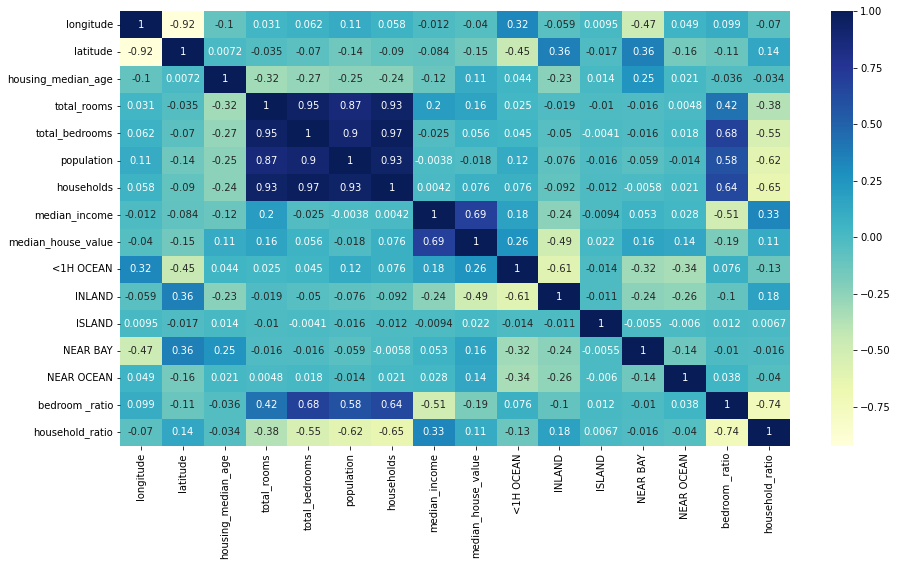

In [184]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_d.corr(),cmap="YlGnBu", annot=True)
plt.savefig('Heatmap_Correlation_3.png')

## 4/Apply the linear regression Model

In [170]:
from sklearn.linear_model import LinearRegression

X_train=train_d.drop(['median_house_value'], axis=1)
y_train=train_d['median_house_value']
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [171]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom _ratio,household_ratio
2814,-119.05,35.42,41.0,7.597396,6.045005,6.914731,6.040255,2.8393,0,1,0,0,0,0.795668,1.257794
9211,-120.31,37.11,38.0,7.436617,5.710427,6.893656,5.631212,2.4054,0,1,0,0,0,0.767880,1.320607
5938,-117.90,34.14,29.0,7.714677,6.126869,7.080026,6.011267,3.8365,1,0,0,0,0,0.794183,1.283370
20163,-119.31,34.44,5.0,6.001415,3.891820,5.342334,4.007333,12.6320,0,0,0,0,1,0.648484,1.497608
9063,-118.16,34.68,9.0,8.367300,6.803505,7.714677,6.759255,3.7807,0,1,0,0,0,0.813106,1.237903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15776,-122.45,37.77,52.0,8.278936,6.748760,7.460490,6.682109,4.5052,0,0,0,1,0,0.815172,1.238971
12989,-121.26,38.68,4.0,8.033009,6.719013,7.086738,6.527958,2.7477,0,1,0,0,0,0.836425,1.230555
14688,-117.08,32.80,25.0,7.994295,6.315358,7.058758,6.322565,3.6250,0,0,0,0,1,0.789983,1.264407
6072,-117.85,34.08,23.0,7.057037,5.117994,6.148468,5.187386,8.1050,1,0,0,0,0,0.725233,1.360423


In [172]:
y_train

2814      57000.0
9211     112500.0
5938     184200.0
20163    500001.0
9063     110900.0
           ...   
15776    500001.0
12989    133000.0
14688    184500.0
6072     386200.0
10036     90600.0
Name: median_house_value, Length: 16346, dtype: float64

In [173]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data["bedroom _ratio"] = test_data['total_bedrooms']/test_data['total_rooms']
test_data["household_ratio"] = test_data['total_rooms']/test_data["households"]



In [174]:
X_test=test_data.drop(['median_house_value'], axis=1)
y_test=test_data['median_house_value']

In [175]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom _ratio,household_ratio
8896,-118.49,34.02,27.0,8.460834,7.078342,7.573531,7.071573,4.1365,1,0,0,0,0,0.836601,1.196457
19660,-120.85,37.51,15.0,7.031741,5.655992,6.591674,5.641907,1.5531,0,1,0,0,0,0.804352,1.246341
5760,-118.29,34.17,52.0,7.457609,5.723585,6.775366,5.743003,4.3250,1,0,0,0,0,0.767483,1.298556
6760,-118.12,34.10,34.0,7.978996,6.320768,7.269617,6.343880,4.2344,1,0,0,0,0,0.792176,1.257747
17345,-120.43,34.86,17.0,7.566828,5.852202,6.774224,5.746203,3.8203,1,0,0,0,0,0.773402,1.316840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4048,-118.53,34.14,28.0,8.842316,6.810142,7.830426,6.758095,9.2189,1,0,0,0,0,0.770176,1.308404
4168,-118.21,34.11,32.0,7.922986,6.214608,7.415777,6.280396,4.3812,1,0,0,0,0,0.784377,1.261542
11778,-121.29,38.76,12.0,7.089243,5.164786,6.095825,5.141664,6.0097,0,1,0,0,0,0.728538,1.378784
13564,-117.29,34.15,42.0,7.502186,5.846439,6.753438,5.866468,2.9667,0,1,0,0,0,0.779298,1.278825


In [176]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom _ratio,household_ratio
2814,-119.05,35.42,41.0,7.597396,6.045005,6.914731,6.040255,2.8393,0,1,0,0,0,0.795668,1.257794
9211,-120.31,37.11,38.0,7.436617,5.710427,6.893656,5.631212,2.4054,0,1,0,0,0,0.767880,1.320607
5938,-117.90,34.14,29.0,7.714677,6.126869,7.080026,6.011267,3.8365,1,0,0,0,0,0.794183,1.283370
20163,-119.31,34.44,5.0,6.001415,3.891820,5.342334,4.007333,12.6320,0,0,0,0,1,0.648484,1.497608
9063,-118.16,34.68,9.0,8.367300,6.803505,7.714677,6.759255,3.7807,0,1,0,0,0,0.813106,1.237903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15776,-122.45,37.77,52.0,8.278936,6.748760,7.460490,6.682109,4.5052,0,0,0,1,0,0.815172,1.238971
12989,-121.26,38.68,4.0,8.033009,6.719013,7.086738,6.527958,2.7477,0,1,0,0,0,0.836425,1.230555
14688,-117.08,32.80,25.0,7.994295,6.315358,7.058758,6.322565,3.6250,0,0,0,0,1,0.789983,1.264407
6072,-117.85,34.08,23.0,7.057037,5.117994,6.148468,5.187386,8.1050,1,0,0,0,0,0.725233,1.360423


In [177]:
reg.score(X_test, y_test)

0.6690481562340758

In [ ]:
# It's a good score but we can improve it by using The Random Forest Model